<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/statistics_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

# Примеры матрицы ковариаций для 3 выборок

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa


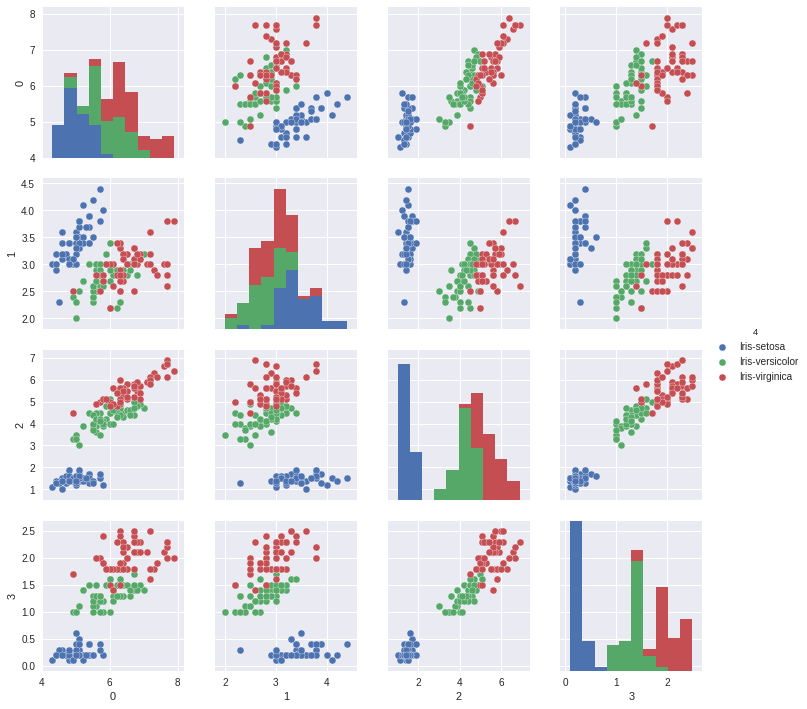

In [90]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
print(data[0:4])
fig = sns.pairplot(data=data, 
                   hue=4)

plt.show()

Матрица ковариаций для 4-мерного пространства:

$$
\Sigma = \begin{bmatrix}
    \sigma_{1}^2  &amp; \sigma_{1,2} &amp; \sigma_{1,3} &amp; \sigma_{1,4} \\
    \sigma_{2,1}  &amp; \sigma_{2}^2 &amp; \sigma_{2,3} &amp; \sigma_{2,4} \\
    \sigma_{3,1}  &amp; \sigma_{3,2} &amp; \sigma_{3}^2 &amp; \sigma_{4,3} \\
    \sigma_{4,1}  &amp; \sigma_{4,2} &amp; \sigma_{4,3} &amp; \sigma_{4}^2
\end{bmatrix}
$$

Разброс выборки рассчитывается по формуле:
$$\sigma^2_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

In [92]:
np.cov(X.T)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

# Пример избавления от выбросов:

Чтобы избавиться от выбросов, иногда применяют следующий метод: убирают по 5–10% самых больших и самых маленьких котиков и уже от оставшихся считают среднее. 

In [3]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url).head(300)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Масштабирование

In [24]:

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[['Small Bags', 'Large Bags']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0 -0.938618 -0.996444
1 -0.932020 -0.996282
2 -0.943222 -0.996067
3 -0.962617 -0.994899
4 -0.960084 -0.992461


In [0]:
small_bags = df_norm[0]
large_bags = df_norm[1]

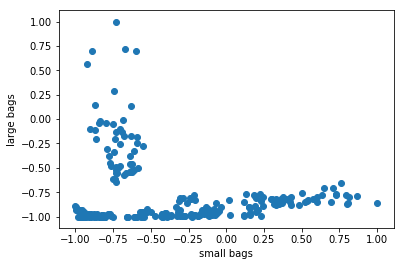

In [18]:
plt.xlabel('small bags')
plt.ylabel('large bags')
plt.scatter(small_bags, large_bags)

Удалить 10% выбросов по краям: **усеченное среднее**

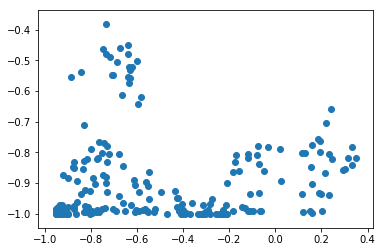

In [39]:
x1 = int(len(small_bags)*0.1)
x2 = int(len(small_bags)*0.9)
sm = sorted(np.array(small_bags))[x1:x2]
min_small = min(sm)
max_small = max(sm)
lg = sorted(np.array(large_bags))[x1:x2]
min_large = min(lg)
max_large = max(lg)
x_new = small_bags[(small_bags >= min_small) & (small_bags <= max_small)]
y_new = large_bags[(large_bags >= min_large) & (large_bags <= max_large)]
length = min(len(x_new), len(y_new))
plt.scatter(x_new[:length], y_new[:length])

Посмотрим разброс данных для large_bags

(array([233.,  18.,  18.,  10.,  13.,   2.,   1.,   1.,   3.,   1.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

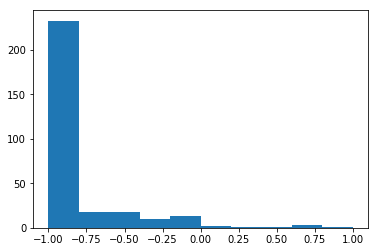

In [40]:
plt.hist(large_bags)

Данное распределение возможно имеет выбросы (значения от 0 до 1). Попробуем нарисовать график без выбросов

(array([188.,  44.,  15.,   4.,  11.,   7.,   4.,   5.,   7.,   7.]),
 array([-1.        , -0.9011126 , -0.80222519, -0.70333779, -0.60445038,
        -0.50556298, -0.40667557, -0.30778817, -0.20890076, -0.11001336,
        -0.01112595]),
 <a list of 10 Patch objects>)

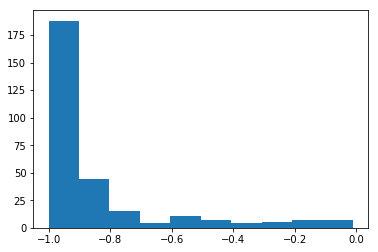

In [43]:
plt.hist(large_bags[large_bags<0])

Посмотрим разброс данных для small_bags

(array([113.,  52.,  24.,  31.,  21.,  16.,  18.,  11.,   9.,   5.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -1.11022302e-16,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01,  1.00000000e+00]),
 <a list of 10 Patch objects>)

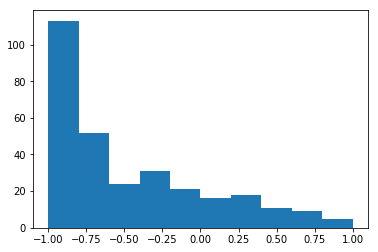

In [41]:
plt.hist(small_bags)

Данное распределение очень похоже на геометрическое распределение и логнормальное

Но геометрическое распределение для дискретных величин, в начшем случае это непрерывная величина. Значит, это скорее логнормальное распределение. 

Генерация логнормального распределения с помощью python

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


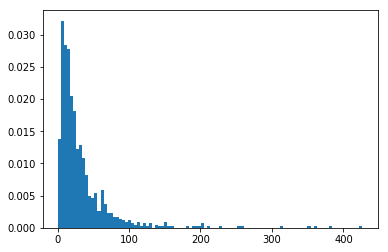

In [42]:
mu, sigma = 3., 1. # среднее значение и отклонение
s = np.random.lognormal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 100, normed=True, align='mid')

Мы можем сделать вывод, что распределение задаётся плотностью вероятности, имеющей вид:
$$p(x)=\frac{1}{\sigma x\sqrt{2\pi }}e^{-\frac{(ln(x)-\mu )^{2}}{2\sigma^{2}}}$$

где $\mu$ это среднее значение, а $\sigma$ стандартное отклонение нормального распределения логарифма. 

# Дискретные распределения

**Распределение Бернулли**

In [0]:
p = 0.3
mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')

Бернулли возвращает значения либо 1, либо 0. Чтобы сгенерировать 10000 случайных чисел Бернулли с вероятностью успеха p =0.3, мы будем использовать bernoulli.rvs с 2мя аргументами.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


[Text(0, 0.5, 'Вероятность'), Text(0.5, 0, 'Бернулли')]

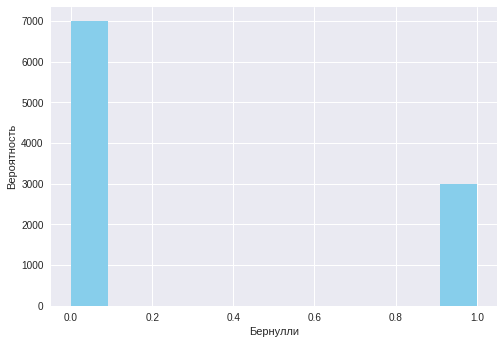

In [37]:
# import seaborn
import seaborn as sns
data_bern = stats.bernoulli.rvs(size=10000,p=0.3)
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')

**Пример** подбрасывание монеты

In [55]:
rng = np.random.RandomState(123)

coin_flips = rng.randint(0, 2, size=1000)
heads = np.sum(coin_flips)
heads

520

С увеличением числа выборки вероятность увеличивается

In [56]:
rng = np.random.RandomState(123)

for i in range(7):
    num = 10**i
    coin_flips = rng.randint(0, 2, size=num)
    heads_proba = np.mean(coin_flips)
    print('Вероятность выпадения решки: %.2f' % (heads_proba*100))

Вероятность выпадения решки: 0.00
Вероятность выпадения решки: 40.00
Вероятность выпадения решки: 47.00
Вероятность выпадения решки: 53.70
Вероятность выпадения решки: 49.53
Вероятность выпадения решки: 49.80
Вероятность выпадения решки: 50.03


Вероятностное распределение в 1000 подбрасываний

1 experiment with coin flips:  [1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1
 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0]


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


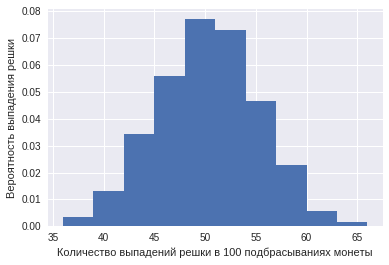

In [62]:
n_experiments = 1000
n_bernoulli_trials = 100

rng = np.random.RandomState(123)
outcomes = np.empty(n_experiments, dtype=np.float)

for i in range(n_experiments):
    num = 10**i
    coin_flips = rng.randint(0, 2, size=n_bernoulli_trials)
    # coin_flips - выборка из 100 подбрасываний
    head_counts = np.sum(coin_flips)
    outcomes[i] = head_counts

print('1 experiment with coin flips: ', coin_flips)
plt.hist(outcomes, normed=True)
plt.xlabel('Количество выпадений решки в 100 подбрасываниях монеты')
plt.ylabel('Вероятность выпадения решки')
plt.show()

# Биномиальное распределение

Обобщение распределения Бернулли

In [0]:
data_binom = stats.binom.rvs(n=10,p=0.8,size=10000)

Рассматриваем n экспериментов с вероятностью успеха p

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


[Text(0, 0.5, 'Частота (плотность)'),
 Text(0.5, 0, 'Биноминальное распределение')]

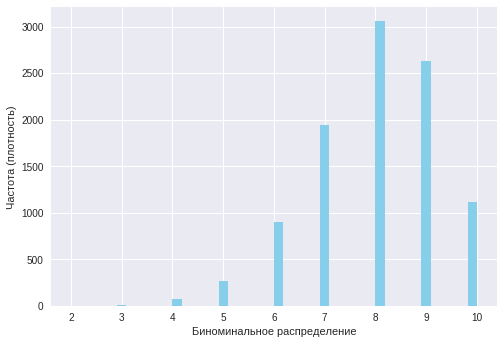

In [40]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Биноминальное распределение', ylabel='Частота (плотность)')

# Геометрическое распределение

Геометри́ческое распределе́ние в теории вероятностей — распределение дискретной случайной величины, равной количеству испытаний случайного эксперимента до наблюдения первого «успеха». 
Пусть $X_{1},...X_{n}$ - бесконечная последовательность независимых случайных величин с распределением Бернулли, то есть
$$X_{i} = \left \{ \begin{matrix}
1, & p & \\ 
0, & q=1-p & i = 1,2,.. 
\end{matrix} \right.$$
Построим случайную величину ${\displaystyle Y=\min \left\{i\mid X_{i}=1\right\}-1}$ — количество «неудач» до первого «успеха». Распределение случайной величины Y называется геометрическим с вероятностью «успеха» p, что обозначается следующим образом:  $Y\sim \mathrm {Geom} (p)$.
Функция вероятности случайной величины Y имеет вид:

${\displaystyle \mathbb {P} (Y=n)=q^{n}p,\;n=0,1,2,\ldots } $

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  14  15  \
row_0                                                                         
counts  5065  2470  1239  599  308  147  91  31  21  12   7   4   1   3   1   

col_0   17  
row_0       
counts   1  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24b91d5cf8>]],
      dtype=object)

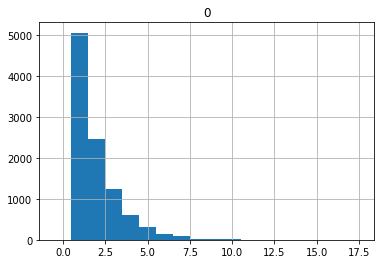

In [45]:
import random
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # сгенерировать дату
                                  p=0.5)       # с вероятностью успеха 0.5

# Напечатать данные
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Частотная зависимость
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1)

График распределения похож на то, что мы ожидаем: очень вероятно получить значение решки за одно или два подкидывания монеты, и маловероятно получить только за 5 подкидываний. В 10000 сгенерированных подкидываний, самое максимальное занимает 13 подкидываний, чтобы получить решку. 

# Распределение Стьюдента



Получение информации о распределении

In [0]:
from scipy.stats import t

# Freeze for df=20, loc=0, scale=1 and get the first four moments from stats()
rv = t(df=20, loc=0, scale=1)
mean, var, skew, kurt = rv.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.), array(1.11111111), array(0.), array(0.375))

График плотности распределения

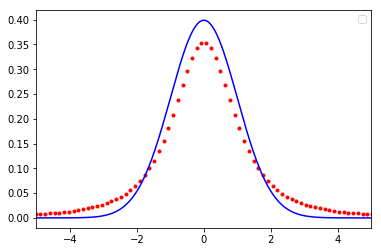

In [0]:
rv = t(df=2, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 1000)
y = rv.pdf(x) 
# A simplistic way to do it
x1 = np.linspace(-5,5,1000)     # define a big enough x interval 
y1 = norm.pdf(x1)              # get the norm.pdf for x interval   

plt.xlim(-5,5)
plt.legend(['Нормальное распределение', 'Стьюдента'])
plt.plot(x,y,'r.')
plt.plot(x1,y1,'b')
plt.show()

Вероятность перехода пороговой границы 

In [0]:
a = 0.05  # задать порог

rv = t(df=20, loc=0, scale=1)
x = np.random.normal(size=1)

p = rv.sf(x) # задаем

if p < a:
    print('Cutoff at: ', x, p)
else:
    print('No cutoff', x, p)

No cutoff [0.86481011] [0.1986988]


# Проверка гипотезы t-критерия Стьюдента

In [0]:
import pandas as pd
import io
import requests
url='http://yustiks.ru/bog_clean.csv'
s=requests.get(url).content
taxi_bog=pd.read_csv(io.StringIO(s.decode('utf-8')))

url='http://yustiks.ru/mex_clean.csv'
s=requests.get(url).content
taxi_mex = pd.read_csv(io.StringIO(s.decode('utf-8')))

Рассмотрим две выборки $X$ и $Y$, и мы хотим сравнить их средние значения $\mu_x$ и $\mu_y$

Тогда рассматривается нулевая гипотеза:
$$
H_0: \mu_x = \mu_y
$$
и альтернативная:

$$
H_1: \mu_x \ne \mu_y.
$$

t-критерий Стьюдента — общее название для класса методов статистической проверки гипотез (статистических критериев), основанных на распределении Стьюдента. Наиболее частые случаи применения t-критерия связаны с проверкой равенства средних значений в двух выборках.

t-статистика строится обычно по следующему общему принципу: в числителе случайная величина с нулевым математическим ожиданием (при выполнении нулевой гипотезы), а в знаменателе — выборочное стандартное отклонение этой случайной величины, получаемое как квадратный корень из несмещённой оценки дисперсии.

После этого t-статистики находится уровень значимости и сравниваетя с заранее заданным p-value. P-value - это вероятность того что данные выборки получились случайным способом.

Если статистика меньше уровня значимости, то нулевая гипотеза отвергается. В противном случае она не отвергается.

# Одновыборочный t-критерий

$$t = \frac{\overline X - m}{s_X / \sqrt{n}}$$

In [48]:
sample = taxi_mex['wait_sec'].sample(n=3000)/60
stats.ttest_1samp(sample, 10)

Ttest_1sampResult(statistic=1.2113984573822072, pvalue=0.22583817370086087)

# Двухвыборочный критерий для независимых выборок

$$t = \frac{\overline X_1 - \overline X_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

In [0]:
taxi_mex['pickup_datetime'] = pd.to_datetime(taxi_mex.pickup_datetime)
taxi_mex['month'] = taxi_mex['pickup_datetime'].dt.month

In [50]:
taxi_bog.shape

(3063, 12)

In [51]:
taxi_mex.shape

(12694, 13)

Длительность поездок - отличается ли средняя длительность поездки по Мехико от средней поездки по Боготе?

In [52]:
stats.ttest_ind(taxi_mex['trip_duration'].sample(n=3000), taxi_bog['trip_duration'].sample(n=3000))

Ttest_indResult(statistic=-5.61811116439023, pvalue=2.0173426501596677e-08)

p-value меньше уровня значимости, а это означает, что мы отвергаем нулевую гипотезу, и выборки имеют разные средние

А вот в случае ожидания времени такси мы уже не можем отвергнуть нулевую гипотезу

In [53]:
stats.ttest_ind(taxi_mex['wait_sec'].sample(n=3000), taxi_bog['wait_sec'].sample(n=3000))

Ttest_indResult(statistic=0.37578742925822234, pvalue=0.707088223516454)

# Двухвыборочный критерий для зависимых выборок

Для вычисления эмпирического значения t-критерия в ситуации проверки гипотезы о различиях между двумя зависимыми выборками (например, двумя пробами одного и того же теста с временным интервалом) применяется следующая формула:

In [54]:
control = taxi_mex[taxi_mex.month == 11]['trip_duration'].sample(n=1000)
treatment = taxi_mex[taxi_mex.month == 12]['trip_duration'].sample(n=1000)

stats.ttest_rel(control, treatment)

Ttest_relResult(statistic=-0.8880910999792782, pvalue=0.374705519388131)

# Другие методы тестирования

https://en.wikipedia.org/wiki/A/B_testing - примеры других критериев

Создаем вектор значений для выборки 

In [91]:
X = data[data.columns[:-1]].values
X.shape

(150, 4)